## Linear autoencoder

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input
import numpy as np
import matplotlib.pyplot as plt
tf.__version__

'2.15.0'

## Loading the dataset

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [4]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [5]:
X_test.shape, y_test.shape

((10000, 28, 28), (10000,))

In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [7]:
y_train[0]

5

In [8]:
X_train[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [9]:
y_train[1]

0

## Visualizing the images

In [10]:
np.random.randint(0, 59999)

48857

0


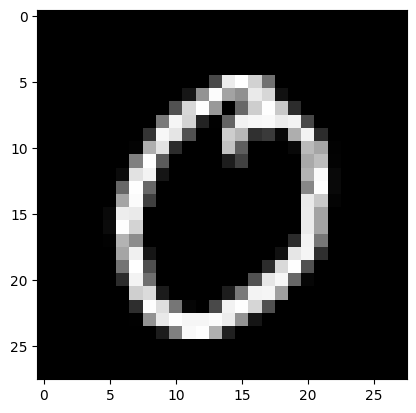

In [11]:
i = np.random.randint(0, 59999)
print(y_train[i])
plt.imshow(X_train[i], cmap='gray');

In [12]:
np.arange(0, 20)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

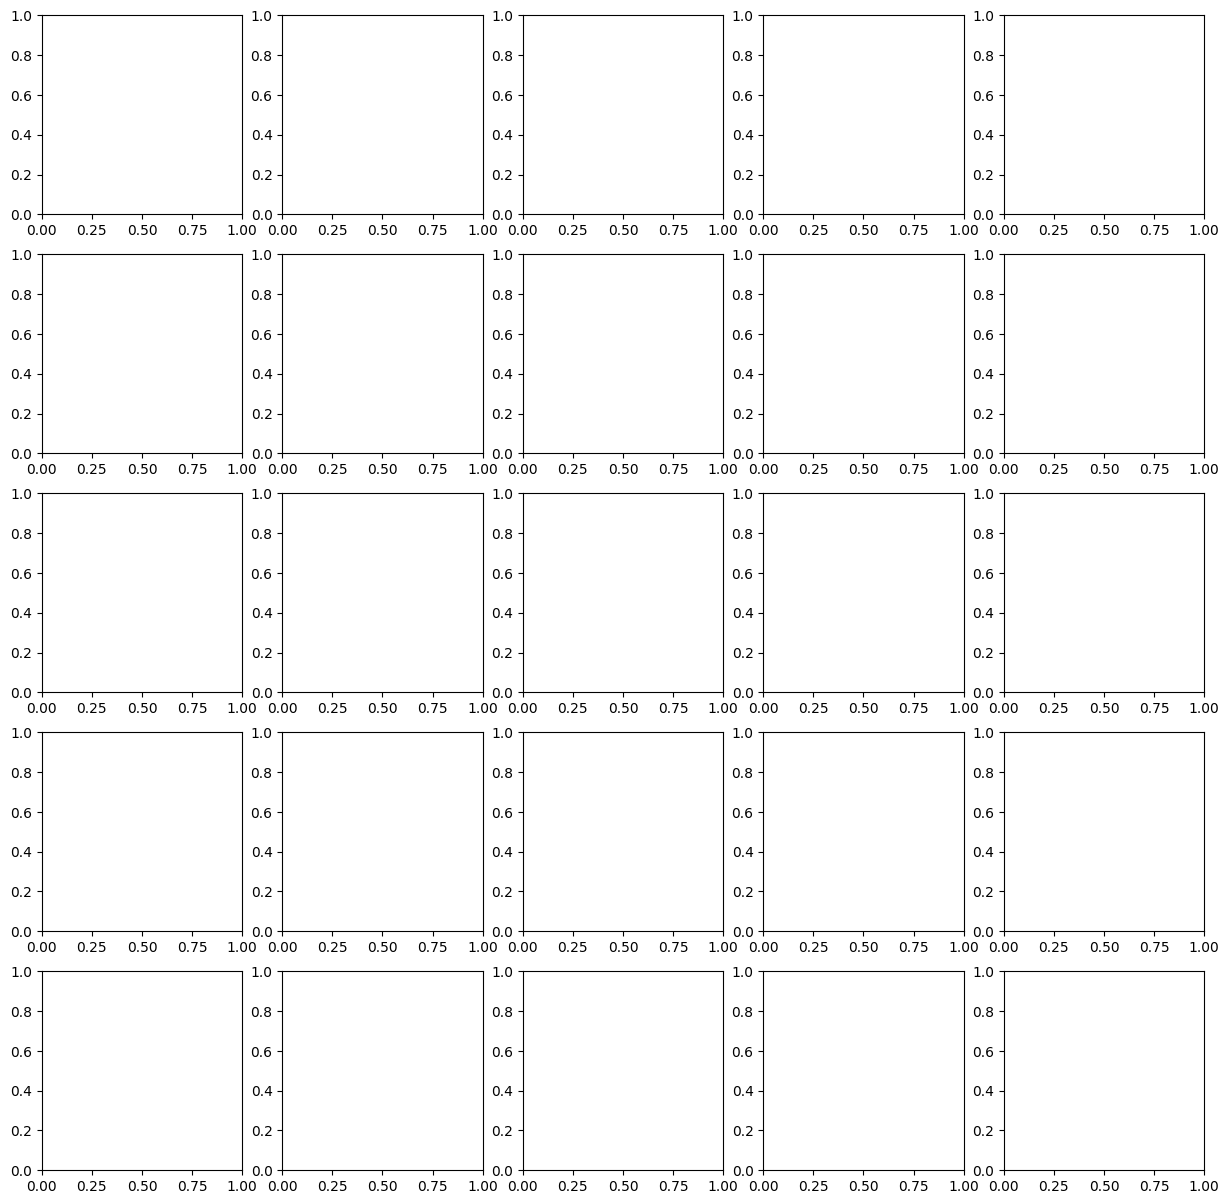

In [13]:
width = 5
height = 5
fig, axes = plt.subplots(height, width, figsize=(15, 15))

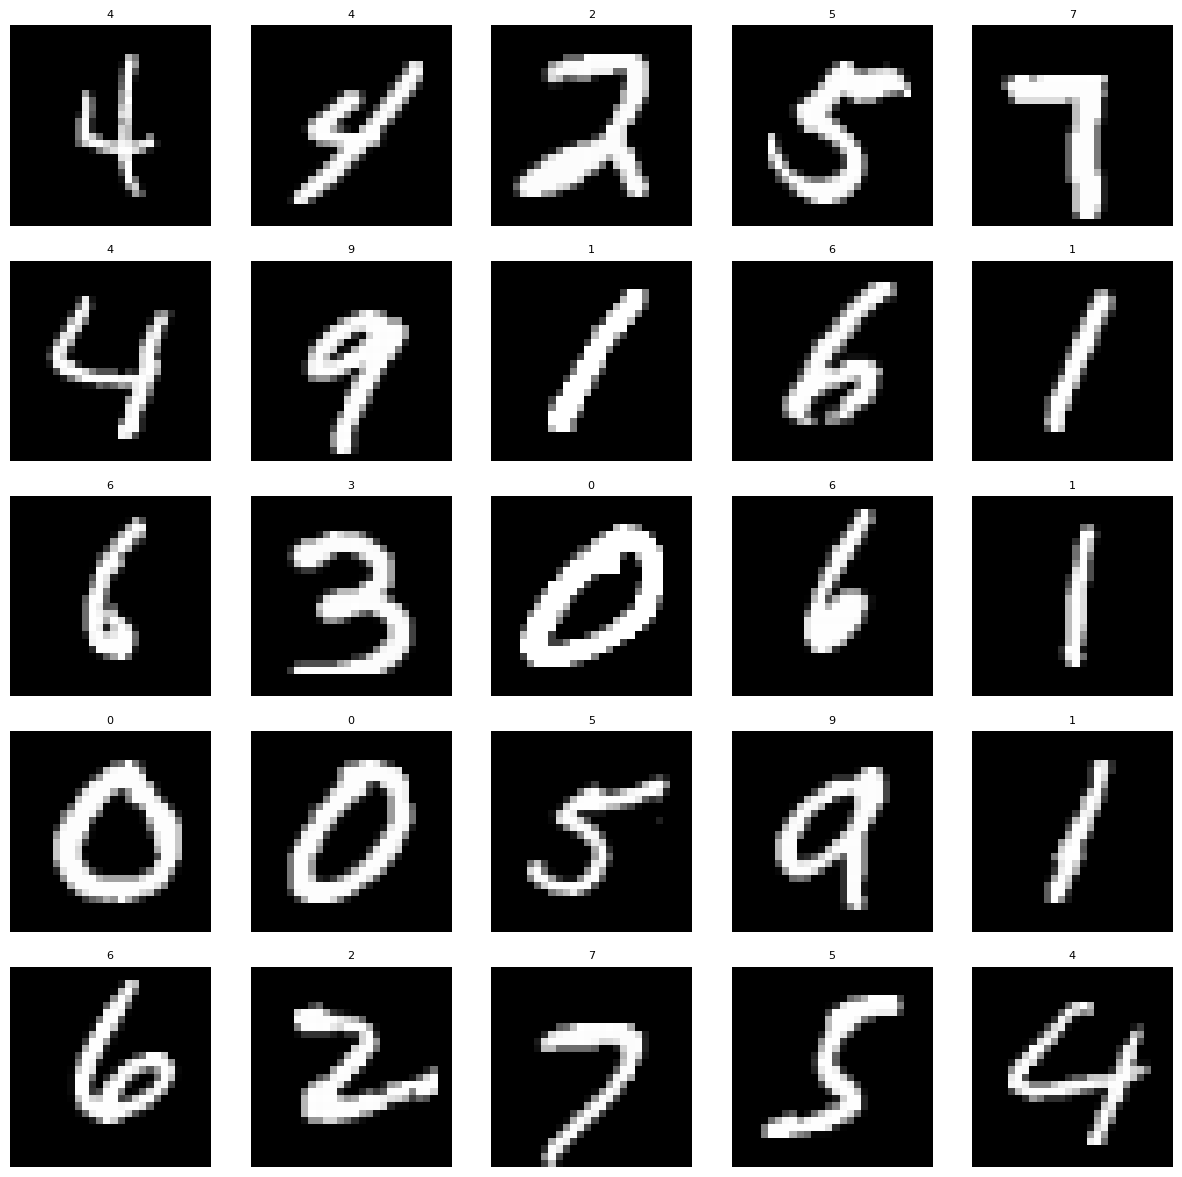

In [14]:
width = 5
height = 5
fig, axes = plt.subplots(height, width, figsize=(15, 15))

axes = axes.ravel() # -> (10,10) -> [100]  ## returns contiguous flattened array(1D array with all the input-array elements and with the same type as it


for i in np.arange(0, width * height):
  index = np.random.randint(0, 59999)
  axes[i].imshow(X_train[index], cmap = 'gray')
  axes[i].set_title(y_train[index], fontsize = 8)
  axes[i].axis('off')
plt.subplots_adjust(hspace=0.1)

## Pre-processing the images

In [15]:
X_train[0].min(), X_train[0].max()

(0, 255)

In [16]:
## normalize pixel values

X_train = X_train / 255
X_test = X_test / 255

In [17]:
X_train[0].min(), X_train[0].max()

(0.0, 1.0)

In [18]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [22]:
X_train.shape[0]

60000

In [23]:
X_train.shape[1]

28

In [24]:
X_train.shape[2]

28

In [25]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2])
X_train.shape

(60000, 784)

In [26]:
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2])
X_test.shape

(10000, 784)

## Building and training the linear autoencoder

## Input Data -> Encoder -> Latent Space -> Decoder -> Reconstructed Data

### 784 - 128 - 64 - 32 - 64 - 128 - 784

In [27]:
autoencoder = Sequential()

# Encode
autoencoder.add(Dense(units = 128, activation='relu', input_dim = 784))
autoencoder.add(Dense(units = 64, activation='relu'))
autoencoder.add(Dense(units = 32, activation='relu')) # Encoded image

# Decode
autoencoder.add(Dense(units = 64, activation='relu'))
autoencoder.add(Dense(units = 128, activation='relu'))
autoencoder.add(Dense(units = 784, activation='sigmoid'))  ## in case of classification model: units=10 (no of classes) and activation='softmax'

In [28]:
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 64)                2112      
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dense_5 (Dense)             (None, 784)               101136    
                                                                 
Total params: 222384 (868.69 KB)
Trainable params: 22238

In [29]:
autoencoder.compile(optimizer='Adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [31]:
autoencoder.fit(X_train, X_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0876 - accuracy: 0.0134
Epoch 2/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0871 - accuracy: 0.0141
Epoch 3/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0867 - accuracy: 0.0136
Epoch 4/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0864 - accuracy: 0.0129
Epoch 5/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0861 - accuracy: 0.0137
Epoch 6/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0858 - accuracy: 0.0132
Epoch 7/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0855 - accuracy: 0.0142
Epoch 8/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0851 - accuracy: 0.0137
Epoch 9/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0848 - accuracy: 0.0146
Epoch 10/10
1875/1875 [==============================] - 13s 7ms/step -

## Encoding the images

In [32]:
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 64)                2112      
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dense_5 (Dense)             (None, 784)               101136    
                                                                 
Total params: 222384 (868.69 KB)
Trainable params: 22238

In [34]:
autoencoder.layers

In [33]:
autoencoder.input

<KerasTensor: shape=(None, 784) dtype=float32 (created by layer 'dense_input')>

In [35]:
autoencoder.get_layer('dense_2').output

<KerasTensor: shape=(None, 32) dtype=float32 (created by layer 'dense_2')>

In [36]:
encoder = Model(inputs = autoencoder.input, outputs = autoencoder.get_layer('dense_2').output)

In [37]:
encoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_input (InputLayer)    [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
Total params: 110816 (432.88 KB)
Trainable params: 110816 (432.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


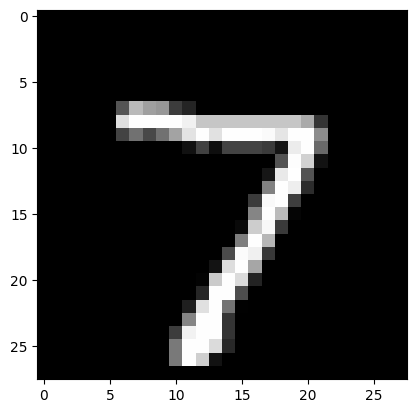

In [38]:
plt.imshow(X_test[0].reshape(28,28), cmap='gray');

In [39]:
X_test[0].reshape(1, -1).shape

(1, 784)

In [40]:
encoded_image = encoder.predict(X_test[0].reshape(1,-1))

1/1 [==============================] - 0s 115ms/step


In [41]:
encoded_image

array([[ 8.380403 ,  2.7016015,  4.84106  ,  5.475839 ,  0.       ,
        12.572326 ,  9.633291 ,  5.4871683,  0.       ,  6.927996 ,
         0.       ,  8.022101 ,  6.085892 ,  6.6079154,  9.232096 ,
         7.6260777,  0.       ,  0.       , 13.801322 ,  7.707621 ,
         0.       ,  4.1596785,  4.7820945,  6.6419635,  9.297604 ,
         1.9940646,  7.4123106,  9.880274 ,  6.1193237, 12.992598 ,
        12.606671 ,  5.2704153]], dtype=float32)

In [42]:
encoded_image.shape

(1, 32)

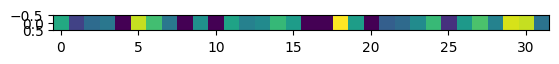

In [47]:
plt.imshow(encoded_image);

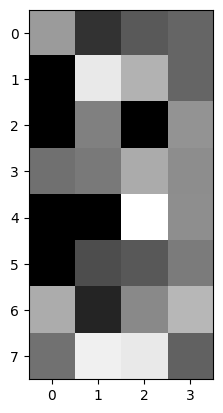

In [43]:
plt.imshow(encoded_image.reshape(8,4), cmap='gray');

## Decoding the images

In [44]:
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 64)                2112      
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dense_5 (Dense)             (None, 784)               101136    
                                                                 
Total params: 222384 (868.69 KB)
Trainable params: 22238

In [45]:
input_layer_decoder = Input(shape=(32,))
decoder_layer1 = autoencoder.layers[3]
decoder_layer2 = autoencoder.layers[4]
decoder_layer3 = autoencoder.layers[5]
decoder = Model(inputs = input_layer_decoder, outputs = decoder_layer3(decoder_layer2(decoder_layer1(input_layer_decoder))))
decoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32)]              0         
                                                                 
 dense_3 (Dense)             (None, 64)                2112      
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dense_5 (Dense)             (None, 784)               101136    
                                                                 
Total params: 111568 (435.81 KB)
Trainable params: 111568 (435.81 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [46]:
decoded_image = decoder.predict(encoded_image)

1/1 [==============================] - 0s 61ms/step


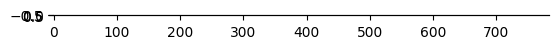

In [48]:
plt.imshow(decoded_image);

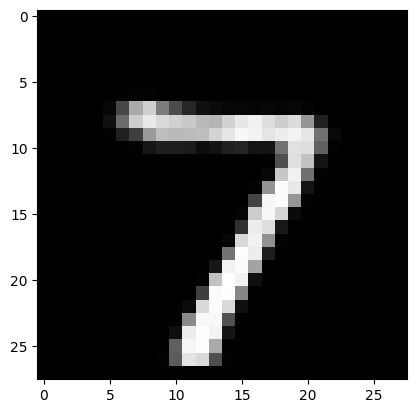

In [49]:
plt.imshow(decoded_image.reshape(28,28), cmap='gray');

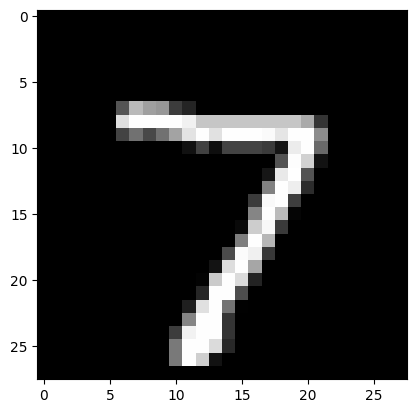

In [53]:
## original image
plt.imshow(X_test[0].reshape(28,28), cmap = 'gray');

## Encoding and decoding the test images

In [50]:
X_test.shape

(10000, 784)

In [51]:
X_test.shape[0] ## 0 to (10000-1)

10000

In [55]:
n_images = 10
test_images = np.random.randint(0, X_test.shape[0] - 1, size = n_images)

1/1 [==============================] - 0s 30ms/step


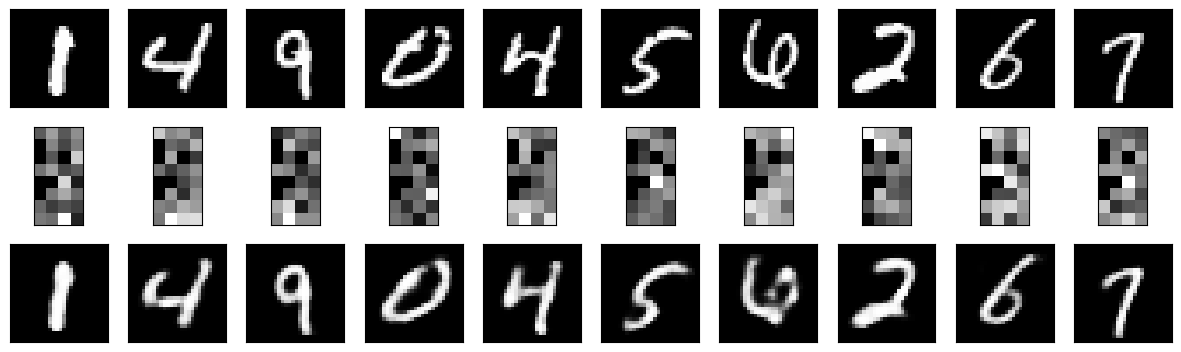

In [56]:
plt.figure(figsize=(15,15))
for i, image_index in enumerate(test_images):
  ax = plt.subplot(10,10,i + 1)
  plt.imshow(X_test[image_index].reshape(28,28), cmap='gray')
  plt.xticks(())
  plt.yticks(())

  # Coded images
  ax = plt.subplot(10,10,i + 1 + n_images)
  encoded_image = encoder.predict(X_test[image_index].reshape(1,-1))
  plt.imshow(encoded_image.reshape(8,4), cmap = 'gray')
  plt.xticks(())
  plt.yticks(())

  # Decoded images
  ax = plt.subplot(10,10,i + 1 + n_images * 2)
  plt.imshow(decoder.predict(encoded_image).reshape(28,28), cmap='gray')
  plt.xticks(())
  plt.yticks(())